In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv
/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/349_IM-1697-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/607_IM-2196-1001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2832_IM-1249-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/699_IM-2263-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1931_IM-0602-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/947_IM-2442-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2932_IM-1335-1001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2303_IM-0882-1001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/291_IM-1313-2001.dcm.png
/kaggle

In [ ]:
!pip uninstall -y torch torchvision torchaudio torchdata -q
!pip install --no-cache-dir torch==2.4.0 torchvision==0.19.0 torchaudio==2.4.0 --index-url https://download.pytorch.org/whl/cu118 -q

print("Installation complete. Restarting kernel in 3 seconds...")
import os, time
time.sleep(3)
os._exit(00)  # This forces a full kernel restart

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 MB 263.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 250.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 251.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 249.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 360.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 269.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 242.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 241.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 215.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 234.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 244.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# ============================================================
# 0. INSTALL DEPENDENCIES
# ============================================================
import torch, torchvision
print(f"PyTorch: {torch.__version__} | CUDA: {torch.version.cuda}")
print(f"Torchvision: {torchvision.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

# pip installs (run in a cell where shell commands are allowed)
!pip install -q faiss-cpu
!pip install -q open-clip-torch
!pip install -q rouge-score nltk bert-score
!pip install -q peft

PyTorch: 2.4.0+cu118 | CUDA: 11.8
Torchvision: 0.19.0+cu118
CUDA available: True
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.6/23.6 MB 70.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.4 MB/s eta 0:00:00


In [4]:
# ============================================================
# 1. IMPORTS & BASIC SETUP
# ============================================================
import os
import numpy as np
import pandas as pd
from PIL import Image

import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score
from nltk.tokenize import word_tokenize
from rouge_score import rouge_scorer
from bert_score import score as bert_score

from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_nb

import torch
from torch.utils.data import Dataset, DataLoader

from transformers import (
    T5Tokenizer,
    T5ForConditionalGeneration,
    DataCollatorForSeq2Seq,
    TrainingArguments,
    Trainer,
)

import faiss

from open_clip import create_model_from_pretrained, get_tokenizer
import matplotlib.pyplot as plt

from peft import LoraConfig, get_peft_model, TaskType

# NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# ============================================================
# 2. LOAD & PREPARE DATASET (SPLIT BEFORE EMBEDDINGS)
# ============================================================
reports_path = '/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv'
projections_path = '/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv'
images_dir = '/kaggle/input/chest-xrays-indiana-university/images/images_normalized'

reports_df = pd.read_csv(reports_path)
projections_df = pd.read_csv(projections_path)
merged_df = pd.merge(reports_df, projections_df, on='uid', how='inner')
merged_df['image_path'] = images_dir + '/' + merged_df['filename']

# Clean reports
merged_df['findings'] = merged_df['findings'].fillna('').astype(str)
merged_df['impression'] = merged_df['impression'].fillna('').astype(str)
merged_df['report'] = (merged_df['findings'] + ' ' + merged_df['impression']).str.strip()
merged_df = merged_df[merged_df['report'].str.len() > 20].reset_index(drop=True)

print(f"Total dataset size (usable reports): {len(merged_df)}")

# Save merged_df for reuse
merged_path = '/kaggle/working/merged_df.csv'
merged_df.to_csv(merged_path, index=False)
print(f"Saved merged_df to {merged_path}")

# IMPORTANT: Correct train/val/test split BEFORE computing embeddings
test_df = merged_df.sample(frac=0.15, random_state=42)      # 15% test
train_val_df = merged_df.drop(test_df.index).reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
val_df = train_val_df.sample(frac=0.15, random_state=42)    # 15% of remaining as val
train_df = train_val_df.drop(val_df.index).reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

print(f"Train size: {len(train_df)}, Val size: {len(val_df)}, Test size: {len(test_df)}")

Total dataset size (usable reports): 7400
Saved merged_df to /kaggle/working/merged_df.csv
Train size: 5346, Val size: 944, Test size: 1110


In [6]:
# ============================================================
# 3. LOAD BIOMEDCLIP MODEL
# ============================================================
print("Loading BiomedCLIP...")
clip_model, preprocess = create_model_from_pretrained(
    'hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224'
)
clip_model = clip_model.to(device)
clip_model.eval()

tokenizer_clip = get_tokenizer('hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224')

for param in clip_model.parameters():
    param.requires_grad = False

print("BiomedCLIP loaded and frozen.")

Loading BiomedCLIP...


open_clip_config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

open_clip_pytorch_model.bin:   0%|          | 0.00/784M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

BiomedCLIP loaded and frozen.


In [7]:
# ============================================================
# 4. EXTRACT OR LOAD BIOMEDCLIP IMAGE EMBEDDINGS (SEPARATE)
# ============================================================

class ChestXrayDataset(Dataset):
    def __init__(self, df):
        self.df = df
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]['image_path']
        image = Image.open(img_path).convert('RGB')
        return preprocess(image), self.df.iloc[idx]['report']

# paths for separate embeddings
train_emb_path = '/kaggle/working/train_embeddings.npy'
val_emb_path   = '/kaggle/working/val_embeddings.npy'
test_emb_path  = '/kaggle/working/test_embeddings.npy'

def compute_embeddings_if_needed(df, path):
    if os.path.exists(path):
        print(f"Loading cached embeddings from {path}")
        return np.load(path)
    else:
        print(f"Computing embeddings and saving to {path} ...")
        dataset = ChestXrayDataset(df)
        dataloader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=2)
        embeddings = []
        with torch.no_grad():
            for images, _ in tqdm_nb(dataloader, desc=f"Extracting embeddings for {os.path.basename(path)}"):
                images = images.to(device)
                image_features = clip_model.encode_image(images)
                embeddings.append(image_features.cpu().numpy())
        emb_arr = np.vstack(embeddings)
        np.save(path, emb_arr)
        print(f"Saved embeddings to {path} (shape: {emb_arr.shape})")
        return emb_arr

train_embeddings = compute_embeddings_if_needed(train_df, train_emb_path)
val_embeddings   = compute_embeddings_if_needed(val_df,   val_emb_path)
test_embeddings  = compute_embeddings_if_needed(test_df,  test_emb_path)

# ============================================================
# 5. BUILD FAISS INDEX FOR RAG RETRIEVAL (TRAIN ONLY)
# ============================================================
print("Building FAISS index from TRAIN embeddings (no leakage)...")
dim = train_embeddings.shape[1]
faiss.normalize_L2(train_embeddings)          # normalize train embeddings in-place
index = faiss.IndexFlatIP(dim)  # Inner product
index.add(train_embeddings.astype('float32'))
print(f"FAISS index built: {index.ntotal} vectors (should equal len(train_df))")

index_path = '/kaggle/working/biomedclip_faiss.index'
faiss.write_index(index, index_path)
print(f"FAISS index saved to {index_path}")

# ============================================================
# 6. LOAD FLAN-T5 MODEL (BASELINE DECODER)
# ============================================================
t5_model_name = "google/flan-t5-base"
print(f"Loading T5 model: {t5_model_name}")
t5_tokenizer = T5Tokenizer.from_pretrained(t5_model_name)
t5_model = T5ForConditionalGeneration.from_pretrained(t5_model_name).to(device)
t5_model.eval()
print("T5 model loaded.")

# ============================================================
# 7. BUILD RAG PROMPTS FOR LoRA TRAINING (USING TRAIN INDEX)
# ============================================================
def build_rag_inputs(df_subset, top_k=5):
    df_subset = df_subset.copy()
    input_texts = []

    print(f"Building RAG prompts for {len(df_subset)} samples (retrieving from TRAIN index)...")
    for idx, row in tqdm_nb(df_subset.iterrows(), total=len(df_subset), desc="RAG inputs"):
        img_path = row["image_path"]

        image = Image.open(img_path).convert("RGB")
        image_tensor = preprocess(image).unsqueeze(0).to(device)

        with torch.no_grad():
            query_emb = clip_model.encode_image(image_tensor).cpu().numpy()

        faiss.normalize_L2(query_emb)
        scores, indices = index.search(query_emb.astype("float32"), top_k)

        # IMPORTANT: retrieve reports from train_df ONLY (index was built on train_embeddings)
        retrieved_reports = [train_df.iloc[i]["report"] for i in indices[0]]
        context = " | ".join(retrieved_reports)

        prompt = (
            f"Using similar chest X-ray cases: {context}\n"
            f"Generate a concise radiology report:"
        )
        input_texts.append(prompt)

    df_subset["input_text"] = input_texts
    return df_subset

# SAMPLE SMALL SUBSETS TO AVOID OOM
train_size_lora = min(1200, len(train_df))
val_size_lora   = min(200, len(val_df))

train_df_lora_src = train_df.sample(train_size_lora, random_state=123).reset_index(drop=True)
val_df_lora_src   = val_df.sample(val_size_lora, random_state=456).reset_index(drop=True)

train_rag_df = build_rag_inputs(train_df_lora_src, top_k=5)
val_rag_df   = build_rag_inputs(val_df_lora_src,   top_k=5)

print("Example RAG prompt:")
print(train_rag_df["input_text"].iloc[0][:400], "...\n")

# ============================================================
# 8. DATASET CLASS FOR LoRA TRAINING (TEXT-ONLY)
# ============================================================
class T5LoRADataset(Dataset):
    def __init__(self, df, tokenizer, max_input_len=512, max_target_len=256):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_input_len = max_input_len
        self.max_target_len = max_target_len

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        input_text  = row["input_text"]
        target_text = row["report"]

        # Tokenize input
        model_inputs = self.tokenizer(
            input_text,
            max_length=self.max_input_len,
            truncation=True,
            padding="max_length",
        )

        # Tokenize target
        with self.tokenizer.as_target_tokenizer():
            labels = self.tokenizer(
                target_text,
                max_length=self.max_target_len,
                truncation=True,
                padding="max_length",
            )["input_ids"]

        # Ignore padding in loss
        labels = [
            (token if token != self.tokenizer.pad_token_id else -100)
            for token in labels
        ]
        model_inputs["labels"] = labels

        return {k: torch.tensor(v) for k, v in model_inputs.items()}

train_dataset_lora = T5LoRADataset(train_rag_df, t5_tokenizer, max_input_len=448, max_target_len=192)
val_dataset_lora   = T5LoRADataset(val_rag_df,   t5_tokenizer, max_input_len=448, max_target_len=192)

print(f"LoRA train samples: {len(train_dataset_lora)}, val samples: {len(val_dataset_lora)}")

# ============================================================
# 9. APPLY LoRA TO T5 (PEFT)
# ============================================================
lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    r=8,                   # small for Kaggle
    lora_alpha=16,
    lora_dropout=0.05,
    target_modules=["q", "v"],   # attention projections
)

t5_lora_model = get_peft_model(t5_model, lora_config)
t5_lora_model.print_trainable_parameters()

# ============================================================
# 10. TRAIN LoRA-T5 (KAGGLE-FRIENDLY SETTINGS)
# ============================================================
data_collator = DataCollatorForSeq2Seq(
    tokenizer=t5_tokenizer,
    model=t5_lora_model,
)

training_args = TrainingArguments(
    output_dir="/kaggle/working/t5_lora_radiology",
    per_device_train_batch_size=1,
    gradient_accumulation_steps=8,
    per_device_eval_batch_size=1,
    learning_rate=2e-4,
    num_train_epochs=10,
    logging_steps=50,
    eval_steps=200,
    save_steps=200,
    save_total_limit=1,
    fp16=torch.cuda.is_available(),
    report_to="none",
    eval_strategy="steps"
)

trainer = Trainer(
    model=t5_lora_model,
    args=training_args,
    train_dataset=train_dataset_lora,
    eval_dataset=val_dataset_lora,
    data_collator=data_collator,
    tokenizer=t5_tokenizer,
)

print("Starting LoRA training...")
trainer.train()
print("LoRA training finished.")

# Save adapter
adapter_dir = "/kaggle/working/t5_lora_adapter"
t5_lora_model.save_pretrained(adapter_dir)
t5_tokenizer.save_pretrained(adapter_dir)
print(f"Saved LoRA adapter to {adapter_dir}")

t5_lora_model.eval()


Computing embeddings and saving to /kaggle/working/train_embeddings.npy ...


Extracting embeddings for train_embeddings.npy:   0%|          | 0/168 [00:00<?, ?it/s]

Saved embeddings to /kaggle/working/train_embeddings.npy (shape: (5346, 512))
Computing embeddings and saving to /kaggle/working/val_embeddings.npy ...


Extracting embeddings for val_embeddings.npy:   0%|          | 0/30 [00:00<?, ?it/s]

Saved embeddings to /kaggle/working/val_embeddings.npy (shape: (944, 512))
Computing embeddings and saving to /kaggle/working/test_embeddings.npy ...


Extracting embeddings for test_embeddings.npy:   0%|          | 0/35 [00:00<?, ?it/s]

Saved embeddings to /kaggle/working/test_embeddings.npy (shape: (1110, 512))
Building FAISS index from TRAIN embeddings (no leakage)...
FAISS index built: 5346 vectors (should equal len(train_df))
FAISS index saved to /kaggle/working/biomedclip_faiss.index
Loading T5 model: google/flan-t5-base


tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

T5 model loaded.
Building RAG prompts for 1200 samples (retrieving from TRAIN index)...


RAG inputs:   0%|          | 0/1200 [00:00<?, ?it/s]

Building RAG prompts for 200 samples (retrieving from TRAIN index)...


RAG inputs:   0%|          | 0/200 [00:00<?, ?it/s]

/tmp/ipykernel_122/1685440087.py:202: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSeq2SeqLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Example RAG prompt:
Using similar chest X-ray cases: The heart size and pulmonary vascularity appear within normal limits. The lungs are free of focal airspace disease. No pleural effusion or pneumothorax is seen. 1. No evidence of active disease. | Heart size and pulmonary vascularity appear within normal limits. The lungs are free of focal airspace disease. No pleural effusion or pneumothorax is seen. 1. No evidenc ...

LoRA train samples: 1200, val samples: 200
trainable params: 884,736 || all params: 248,462,592 || trainable%: 0.3561
Starting LoRA training...


/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3951: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/data/data_collator.py:741: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)`

Step,Training Loss,Validation Loss
200,0.010900,4.242991
400,0.006500,5.009155
600,0.006000,5.314385


/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3951: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/usr/local/lib/python3.11/

LoRA training finished.
Saved LoRA adapter to /kaggle/working/t5_lora_adapter


PeftModelForSeq2SeqLM(
  (base_model): LoraModel(
    (model): T5ForConditionalGeneration(
      (shared): Embedding(32128, 768)
      (encoder): T5Stack(
        (embed_tokens): Embedding(32128, 768)
        (block): ModuleList(
          (0): T5Block(
            (layer): ModuleList(
              (0): T5LayerSelfAttention(
                (SelfAttention): T5Attention(
                  (q): lora.Linear(
                    (base_layer): Linear(in_features=768, out_features=768, bias=False)
                    (lora_dropout): ModuleDict(
                      (default): Dropout(p=0.05, inplace=False)
                    )
                    (lora_A): ModuleDict(
                      (default): Linear(in_features=768, out_features=8, bias=False)
                    )
                    (lora_B): ModuleDict(
                      (default): Linear(in_features=8, out_features=768, bias=False)
                    )
                    (lora_embedding_A): ParameterDict()
              

In [8]:
# ============================================================
# 11. INFERENCE: BIOMEDCLIP RETRIEVAL + (LoRA) T5 GENERATION
# ============================================================
@torch.no_grad()
def generate_report(image_path, top_k=5, use_lora=True):
    # Load & preprocess query image
    image = Image.open(image_path).convert('RGB')
    image_tensor = preprocess(image).unsqueeze(0).to(device)
    
    # Extract query embedding
    query_emb = clip_model.encode_image(image_tensor).cpu().numpy()
    faiss.normalize_L2(query_emb)
    
    # Retrieve similar reports from TRAIN index (index built on train_embeddings)
    scores, indices = index.search(query_emb.astype('float32'), top_k)
    retrieved_reports = [train_df.iloc[i]['report'] for i in indices[0]]
    context = " | ".join(retrieved_reports)
    
    # Prompt T5 with context
    prompt = f"Using similar chest X-ray cases: {context}\nGenerate a concise radiology report:"
    inputs = t5_tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True).to(device)
    
    # Choose model
    gen_model = t5_lora_model if use_lora else t5_model
    
    outputs = gen_model.generate(
        **inputs,
        max_new_tokens=150,
        num_beams=4,
        early_stopping=True,
        no_repeat_ngram_size=2,
        temperature=0.7,
        do_sample=True
    )
    
    generated_report = t5_tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_report, context


GENERATED RADIOLOGY REPORT (LoRA-T5 + RAG)
There are no focal areas of consolidation. Yes pleural effusions. No pneumothorax. Heart size within normal limits. Osseous structures intact. Non acute cardiopulmonary abnormality.

RETRIEVED CONTEXT (first 400 chars)
There are no focal areas of consolidation. No pleural effusions. No pneumothorax. Heart size within normal limits. Osseous structures intact. No acute cardiopulmonary abnormality. | 2 images. There is a poorly defined lung nodule in the right upper lobe measuring approximately 7 mm and partially superimposed upon anterior right second rib. Otherwise, the lungs are clear. No pleural effusion or pne...


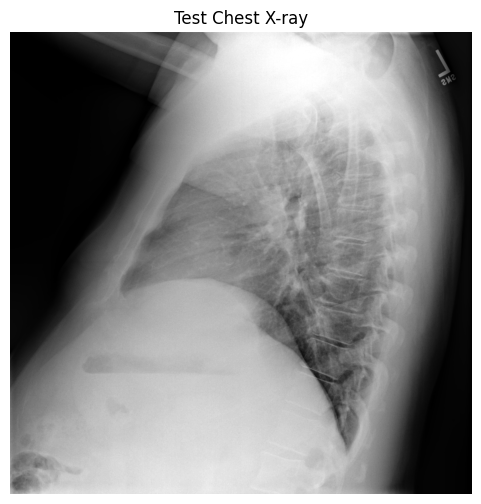

In [9]:
# ============================================================
# 12. QUICK TEST ON ONE RANDOM TEST IMAGE (NO LEAKAGE)
# ============================================================
# Sample from test_df (not merged_df)
test_image_path = test_df.sample(1).iloc[0]['image_path']
generated_report, retrieved_context = generate_report(test_image_path, top_k=5, use_lora=True)

print("\n" + "="*80)
print("GENERATED RADIOLOGY REPORT (LoRA-T5 + RAG)")
print("="*80)
print(generated_report)
print("\n" + "="*80)
print("RETRIEVED CONTEXT (first 400 chars)")
print("="*80)
print(retrieved_context[:400] + "..." if len(retrieved_context) > 400 else retrieved_context)

img = Image.open(test_image_path)
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Test Chest X-ray")
plt.show()

In [10]:
# ============================================================
# 13. LIGHTWEIGHT EVALUATION ON TEST SET
# ============================================================
eval_sample_size = min(100, len(test_df))  # keep small for Kaggle
test_eval_df = test_df.sample(n=eval_sample_size, random_state=42).reset_index(drop=True)

bleu1_list, bleu2_list, bleu3_list, bleu4_list = [], [], [], []
rouge1_f, rouge2_f, rougel_f = [], [], []
meteor_list = []
generated_reports = []
references = []

print("Generating reports for evaluation (LoRA-T5)...")
for idx in tqdm_nb(range(len(test_eval_df)), desc="Evaluating"):
    img_path = test_eval_df.iloc[idx]['image_path']
    true_report = test_eval_df.iloc[idx]['report']
    
    gen_report, _ = generate_report(img_path, top_k=5, use_lora=True)
    
    generated_reports.append(gen_report)
    references.append(true_report)
    
    # Tokenize
    ref_tokens = word_tokenize(true_report.lower())
    gen_tokens = word_tokenize(gen_report.lower())
    
    # BLEU
    smooth = SmoothingFunction().method1
    try:
        bleu1_list.append(sentence_bleu([ref_tokens], gen_tokens, weights=(1,0,0,0), smoothing_function=smooth))
        bleu2_list.append(sentence_bleu([ref_tokens], gen_tokens, weights=(0.5,0.5,0,0), smoothing_function=smooth))
        bleu3_list.append(sentence_bleu([ref_tokens], gen_tokens, weights=(0.33,0.33,0.33,0), smoothing_function=smooth))
        bleu4_list.append(sentence_bleu([ref_tokens], gen_tokens, weights=(0.25,0.25,0.25,0.25), smoothing_function=smooth))
    except Exception as e:
        # If BLEU fails for some cases, append zeros
        bleu1_list.append(0.0); bleu2_list.append(0.0); bleu3_list.append(0.0); bleu4_list.append(0.0)
    
    # METEOR
    try:
        meteor_list.append(meteor_score([ref_tokens], gen_tokens))
    except:
        meteor_list.append(0.0)
    
    # ROUGE
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(true_report, gen_report)
    rouge1_f.append(scores['rouge1'].fmeasure)
    rouge2_f.append(scores['rouge2'].fmeasure)
    rougel_f.append(scores['rougeL'].fmeasure)

Generating reports for evaluation (LoRA-T5)...


Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
# ============================================================
# 14. PERPLEXITY (ON SMALL VALIDATION TEXT SET)
# ============================================================
@torch.no_grad()
def compute_perplexity_t5(model, tokenizer, true_texts, gen_texts, batch_size=4):
    model.eval()
    total_loss = 0
    total_tokens = 0

    for i in range(0, len(true_texts), batch_size):
        batch_true = true_texts[i:i+batch_size]
        batch_gen  = gen_texts[i:i+batch_size]

        # Tokenize reference (labels)
        enc_true = tokenizer(batch_true, return_tensors="pt",
                             padding=True, truncation=True, max_length=512).to(device)
        labels = enc_true.input_ids
        labels[labels == tokenizer.pad_token_id] = -100

        # Tokenize generated text (inputs)
        enc_gen = tokenizer(batch_gen, return_tensors="pt",
                            padding=True, truncation=True, max_length=512).to(device)

        outputs = model(input_ids=enc_gen.input_ids, labels=labels)
        loss = outputs.loss

        num_tokens = (labels != -100).sum().item()
        total_loss += loss.item() * num_tokens
        total_tokens += num_tokens

    avg_loss = total_loss / total_tokens
    return float(np.exp(avg_loss))

# Compute perplexity using evaluation predictions
true_texts = references[:50]
gen_texts  = generated_reports[:50]
perplexity = compute_perplexity_t5(t5_lora_model, t5_tokenizer, true_texts, gen_texts)

print(f"Corrected Perplexity (LoRA-T5): {perplexity:.2f}")

# ============================================================
# 15. BERTSCORE (KEEP SAMPLE SMALL)
# ============================================================
# ============================================================
# 15. BERTSCORE (Precision, Recall, F1)
# ============================================================
print("Computing BERTScore on evaluation subset...")
bert_sample = min(50, len(generated_reports))
P, R, F1 = bert_score(generated_reports[:bert_sample],
                      references[:bert_sample],
                      lang="en", verbose=False)

bert_precision = P.mean().item()
bert_recall    = R.mean().item()
bert_f1        = F1.mean().item()

Corrected Perplexity (LoRA-T5): 80.50
Computing BERTScore on evaluation subset...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
# ============================================================
# 16. PRINT FINAL RESULTS
# ============================================================
print("\n" + "="*60)
print("   FINAL EVALUATION RESULTS (LoRA-T5 + BiomedCLIP RAG)")
print("="*60)
print(f"{'Metric':<15} {'Score':<10}")
print("-"*60)
print(f"{'BLEU-1':<15} {np.mean(bleu1_list):.4f}")
print(f"{'BLEU-2':<15} {np.mean(bleu2_list):.4f}")
print(f"{'BLEU-3':<15} {np.mean(bleu3_list):.4f}")
print(f"{'BLEU-4':<15} {np.mean(bleu4_list):.4f}")
print(f"{'Avg BLEU':<15} {np.mean([np.mean(bleu1_list), np.mean(bleu2_list), np.mean(bleu3_list), np.mean(bleu4_list)]):.4f}")
print(f"{'ROUGE-1':<15} {np.mean(rouge1_f):.4f}")
print(f"{'ROUGE-2':<15} {np.mean(rouge2_f):.4f}")
print(f"{'ROUGE-L':<15} {np.mean(rougel_f):.4f}")
print(f"{'METEOR':<15} {np.mean(meteor_list):.4f}")
print(f"{'BERT-Precision':<15} {bert_precision:.4f}")
print(f"{'BERT-Recall':<15} {bert_recall:.4f}")
print(f"{'BERT-F1':<15} {bert_f1:.4f}")
print(f"{'Perplexity':<15} {perplexity:.2f}")
print("="*60)


   FINAL EVALUATION RESULTS (LoRA-T5 + BiomedCLIP RAG)
Metric          Score     
------------------------------------------------------------
BLEU-1          0.2968
BLEU-2          0.1705
BLEU-3          0.1029
BLEU-4          0.0654
Avg BLEU        0.1589
ROUGE-1         0.3375
ROUGE-2         0.1133
ROUGE-L         0.2469
METEOR          0.2722
BERT-Precision  0.8793
BERT-Recall     0.8739
BERT-F1         0.8763
Perplexity      80.50


In [25]:
# Enable Gradients for BiomedCLIP Vision Encoder (required for CAM++)
for param in clip_model.visual.parameters():
    param.requires_grad = True
torch.set_grad_enabled(True)
clip_model.train()

CustomTextCLIP(
  (visual): TimmModel(
    (trunk): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (norm): Identity()
            (proj): Linear(in_features=768, out_features=768, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
          

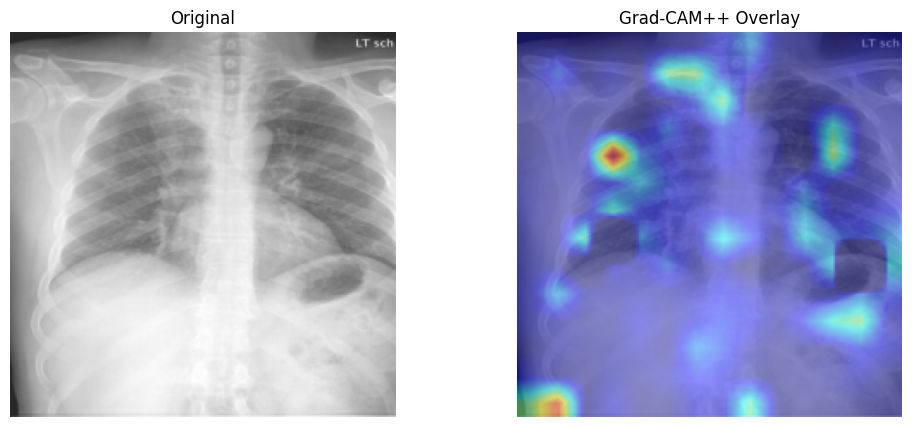

Saved overlay to: /kaggle/working/gradcampp_overlay.png


In [34]:
# -----------------------------
# Fixed Grad-CAM++ for BiomedCLIP (TIMM ViT trunk)
# -----------------------------
import torch
import torch.nn.functional as F
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# === Ensure gradients enabled for visual encoder (needed for CAM) ===
for p in clip_model.visual.parameters():
    p.requires_grad = True
torch.set_grad_enabled(True)
clip_model.train()  # doesn't actually train unless optimizer is used

# -------------------------
# Grad-CAM++ class (fixed)
# -------------------------
class ViT_GradCAMPP:
    def __init__(self, target_module):
        """
        target_module: e.g. clip_model.visual.trunk.blocks[-1].norm1
        """
        self.target_module = target_module
        self.activations = None
        self.gradients = None

        # register hooks on the target module
        target_module.register_forward_hook(self._forward_hook)
        target_module.register_full_backward_hook(self._backward_hook)

    def _forward_hook(self, module, input, output):
        # output shape: (batch, seq_len, embed_dim)
        self.activations = output.detach()

    def _backward_hook(self, module, grad_input, grad_output):
        # grad_output[0] shape: (batch, seq_len, embed_dim)
        self.gradients = grad_output[0].detach()

    def generate_campp(self, input_tensor, image_size=224):
        """
        input_tensor: preprocessed image tensor (1,3,H,W) on device
        returns: cam map (H,W) normalized 0..1
        """
        # clear previous captures
        self.activations = None
        self.gradients = None

        # forward through full clip_model to ensure trunk hooks trigger
        outputs = clip_model.encode_image(input_tensor)  # use full clip_model forward
        # use sum of embedding dims as scalar target (works well)
        target_score = outputs[0].sum()

        # zero grads
        clip_model.zero_grad()
        # backward to populate gradients at hooked layer
        target_score.backward(retain_graph=False)

        # get captured activations & grads
        A = self.activations    # (1, tokens, dim)
        dA = self.gradients     # (1, tokens, dim)
        if A is None or dA is None:
            raise RuntimeError("Activations or gradients not captured. Make sure hooks are registered and forward was called.")

        # Grad-CAM++ weights calculation (per paper)
        # A: (1, T, D), dA: (1, T, D)
        dA2 = dA ** 2
        dA3 = dA ** 3
        # sum over channels for denom term (keepdims for broadcasting)
        # alpha denominator: 2*dA2 + A * sum(dA3, dim=-1, keepdim=True)
        alpha_denom = 2 * dA2 + A * dA3.sum(dim=-1, keepdim=True)
        # avoid divide by zero
        alpha = dA2 / (alpha_denom + 1e-10)

        # relu on gradients
        relu_dA = F.relu(dA)
        # weights per token = sum_c (alpha * relu_dA) over channels
        weights = (alpha * relu_dA).sum(dim=-1)   # (1, tokens)

        # drop CLS token (assumes CLS at index 0)
        weights = weights[:, 1:]                 # (1, num_patches)
        A_map = A[:, 1:, :]                      # (1, num_patches, D)

        # weighted combination across embedding dim
        cam_tokens = (weights.unsqueeze(-1) * A_map).sum(dim=-1)  # (1, num_patches)

        # reshape tokens -> patch grid
        num_patches = cam_tokens.shape[-1]
        grid = int(np.sqrt(num_patches))
        if grid * grid != num_patches:
            # fallback: infer grid from image_size and typical patch size 16
            grid = image_size // 16

        cam = cam_tokens.reshape(grid, grid).cpu().numpy()
        cam = cv2.resize(cam, (image_size, image_size))
        cam = np.maximum(cam, 0)
        cam = cam / (cam.max() + 1e-10)
        return cam

# -------------------------
# overlay function
# -------------------------
def overlay_cam_on_image(image_path, cam_map, alpha=0.45):
    img = Image.open(image_path).convert("RGB").resize((224,224))
    img_np = np.array(img).astype(np.uint8)

    heatmap = cv2.applyColorMap(np.uint8(cam_map * 255), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    overlay = (alpha * heatmap + (1 - alpha) * img_np).astype(np.uint8)
    return overlay

# -------------------------
# wrapper to compute+display Grad-CAM++ for an image
# -------------------------
def generate_gradcam_pp_for_path(image_path, show_raw=True):
    # preprocess and prepare tensor
    image = Image.open(image_path).convert("RGB")
    input_tensor = preprocess(image).unsqueeze(0).to(device)

    # choose hook location based on your model printout:
    target_module = clip_model.visual.trunk.blocks[-1].norm1

    campp = ViT_GradCAMPP(target_module)
    cam_map = campp.generate_campp(input_tensor, image_size=224)
    overlay = overlay_cam_on_image(image_path, cam_map, alpha=0.45)

    # ----------------------
    # ONLY show input + overlay
    # ----------------------
    plt.figure(figsize=(12,5))

    # Original
    plt.subplot(1,2,1)
    plt.imshow(image.resize((224,224)))
    plt.title('Original')
    plt.axis('off')

    # Overlay only
    plt.subplot(1,2,2)
    plt.imshow(overlay)
    plt.title('Grad-CAM++ Overlay')
    plt.axis('off')

    plt.show()

    return cam_map, overlay

# # -------------------------
# # Run on the uploaded image (local path)
# # -------------------------
uploaded_img_path = "/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1000_IM-0003-1001.dcm.png"
cam_map, overlay = generate_gradcam_pp_for_path(uploaded_img_path, show_raw=True)

# Optionally save overlay
out_path = "/kaggle/working/gradcampp_overlay.png"
cv2.imwrite(out_path, cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR))
print("Saved overlay to:", out_path)

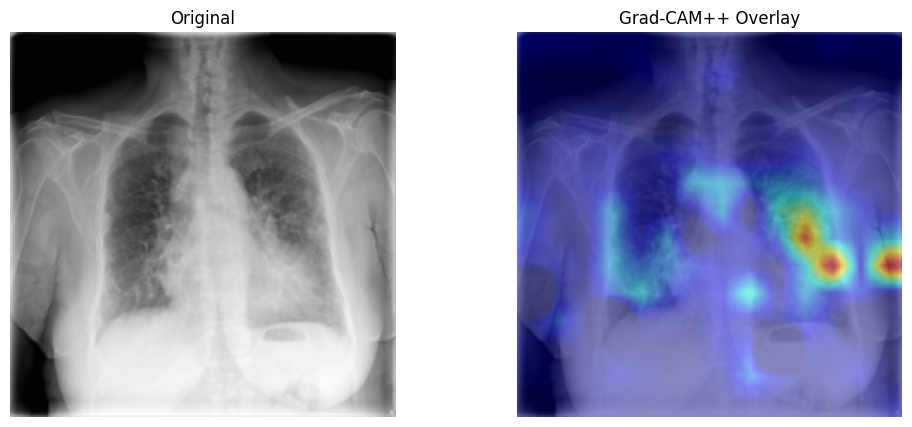

In [36]:
uploaded_img_path = "/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1001_IM-0004-1001.dcm.png"
cam_map, overlay = generate_gradcam_pp_for_path(uploaded_img_path, show_raw=True)

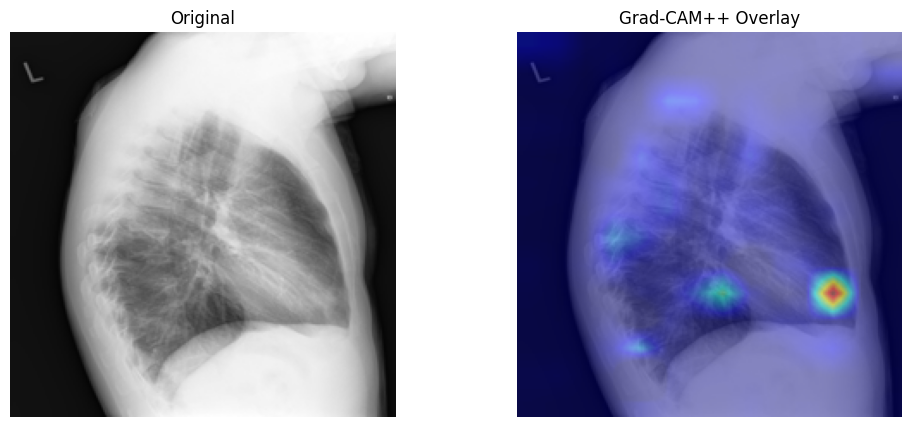

In [38]:
uploaded_img_path = "/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1005_IM-0006-3003.dcm.png"
cam_map, overlay = generate_gradcam_pp_for_path(uploaded_img_path, show_raw=True)